<a href="https://colab.research.google.com/github/domingues100/SEL0449---Computer-Vision/blob/main/Lista6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lista de Exercício 6
### Processamento Digital de Imagens (SEL0449/SEL5895)

**Instruções:**

 1. Esta lista consiste em 3 exercícios.
 1. Deve-se colocar comentários nos códigos desenvolvidos.
 1. As perguntas devem ser respondidas também como comentários no arquivo.
 1. Colocar seu nome e número USP abaixo.
 1. Quaisquer problemas na execução das listas, entrar em contato com os monitores.
 1. Depois de terminado os exercícios, deve ser gerado um arquivo **extensão .ipynb** para ser enviado ao professor pelo E-DISCIPLINAS da disciplina até a data máxima de entrega.
 1. Caso não seja enviado, o aluno ficará sem nota.


---



 <table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/LAVI-USP/SEL0449-SEL5895_2023/blob/main/praticas/Lista_de_Exercicio_6.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Executar no Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/LAVI-USP/SEL0449-SEL5895_2023/raw/main/praticas/Lista_de_Exercicio_6.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />Ver codigo fonte no GitHub</a>
  </td>
</table>


`Nome: ` Gabriel Montagni Domingues Filho

`Número USP: ` 11800903

#### **Atenção**: os códigos abaixo são para fazer o download das imagens (EXECUTE-OS). Os mesmos não fazem parte dessa prática.

In [ ]:
import urllib.request

try:
  urllib.request.urlretrieve("https://github.com/LAVI-USP/SEL0449-SEL5895_2023/raw/main/imagens/pratica_06/hill.tif", "hill.tif")
except:
  print("[ERRO] Não foi possível fazer o download das imagens dessa prática. Entre em contato com o monitor")

try:
  urllib.request.urlretrieve("https://github.com/LAVI-USP/SEL0449-SEL5895_2023/raw/main/imagens/pratica_06/hiIzt.png", "car.png")
except:
  print("[ERRO] Não foi possível fazer o download das imagens dessa prática. Entre em contato com o monitor")

try:
  urllib.request.urlretrieve("https://github.com/LAVI-USP/SEL0449-SEL5895_2023/raw/main/imagens/pratica_06/parede.tif", "parede.tif")
except:
  print("[ERRO] Não foi possível fazer o download das imagens dessa prática. Entre em contato com o monitor")



### Introdução:

Nesta lista de exercícios vamos estudar sobre alguns filtros que podem ser aplicados no domínio da frequência visando melhorar a qualidade das imagens. Lembre-se que o sistemas de coordenadas no domínio da frequência é um pouco diferente:

<center><img src="https://github.com/LAVI-USP/SEL0449-SEL5895_2023/raw/main/imagens/pratica_06/ExemploCoordenadas.png" ></center>

<center><caption><b>Figura 1:</b> Sistemas de coordenadas no domínio original da imagem (esquerda) e domínio de Fourie (direita).</b></caption></center>


 Primeiramente, vamos importar as bibliotecas que iremos utilizar:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

### 1) Filtro notch reject (Nota: 3,0):

Em qual situação devo utilizar um filtro notch? Filtros notch são frequentemente utilizados para rastrear e retirar componentes senoidais de sinais. Nas imagens isto não é diferente.

Filtragem notch reject é usada para eliminar efeitos de ruídos periódicos. Estes filtros são capazes de rejeitar regiões específicas em torno de uma
frequência pré-definida, assim, sua utilização é recomendada quando o sinal a ser atenuado é bem definido.

<center><img src="https://github.com/LAVI-USP/SEL0449-SEL5895_2023/raw/main/imagens/pratica_06/ExemploFiltroNotch2.png" width="380" height="380"></center>

<center><caption><b> Figura 2:</b> Exemplo de filtragem com Notch em ruído periódico.</b></caption></center>
<caption><center> </center></caption>

**Exercício:**

Nesta etapa, vamos trabalhar com a imagem ```car.png```. Considere que a imagem foi digitalizada com resolução de 400 DPI.

1. Carregue o arquivo de imagem ```car.png``` e mostre-a.
2. Passe esta imagem para o domínio da frequência (Espectro de Fourier) utilizando as funções ```np.fft.fft2``` e ```np.fft.fftshift``` (**Lembre-se do padding.**). Em seguida, mostre a magnitude do espectro.
3. Para visualizar e compreender melhor, vamos dar um "zoom" na imagem no domínio da frequência. Selecione a região ```[0:800,200:360]``` e mostre o resultado desse corte. Comente o que são os "pontos brancos mais evidentes" no espectro.
4.  Faça um filtro do tipo notch reject butterworth de ordem ```ord = 4``` com raio ```D0 = 8``` para remover o ruído da seguinte forma:
 *   4 pontos mais próximos do centro do espectro
     *   Encontre o centro dos "pontos brancos" mais próximo ao centro do espectro (pode ser de forma empírica/visual)
     *   Crie o filtro com base no centro desses 4 pontos encontrados
 *   8 pontos mais próximos do centro do espectro
     *   Encontre o centro dos "pontos brancos" mais próximo ao centro do espectro (pode ser de forma empírica/visual)
     *   Crie o filtro com base no centro desses 8 pontos encontrados

 Os centros do filtro devem coincidir com o centro dos pontos encontrados no
espectro da frequência.

5. Para cada situação, moste a magnitude do filtro criado. Após aplicação do filtro construído, mostre, também, a magnitude do espectro de Fourier resultante, bem como a imagem filtrada, agora, em seu domínio original.
6. Comente os resultados


<ipython-input-3-0945d249cb97>:17: RuntimeWarning: divide by zero encountered in double_scalars
  filtro[x,y] = 1/((1+(D0/D1)**(2*n))*(1+(D0/D2)**(2*n)))


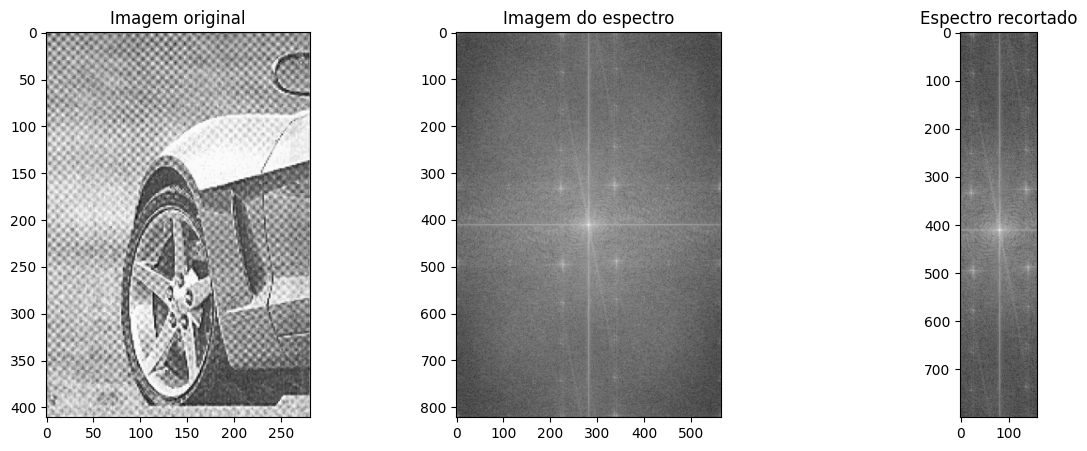

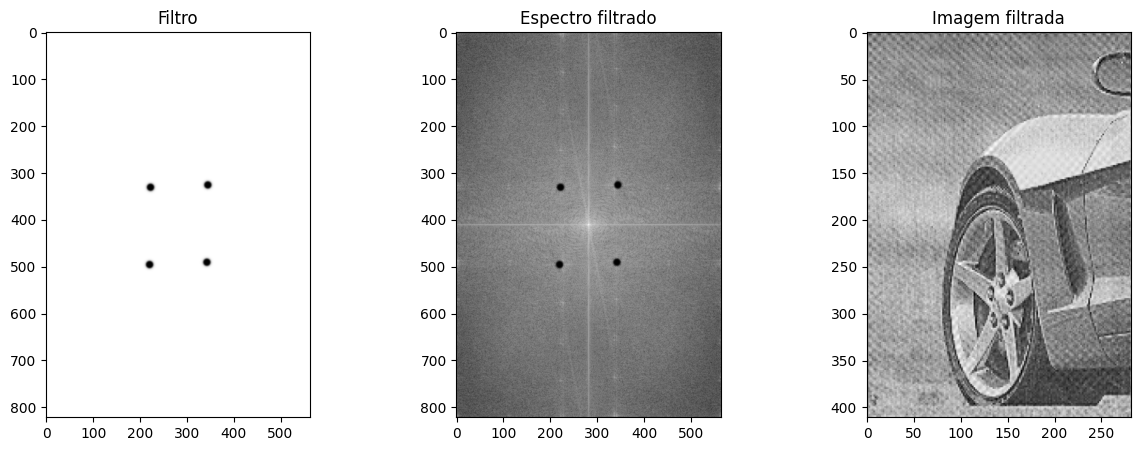

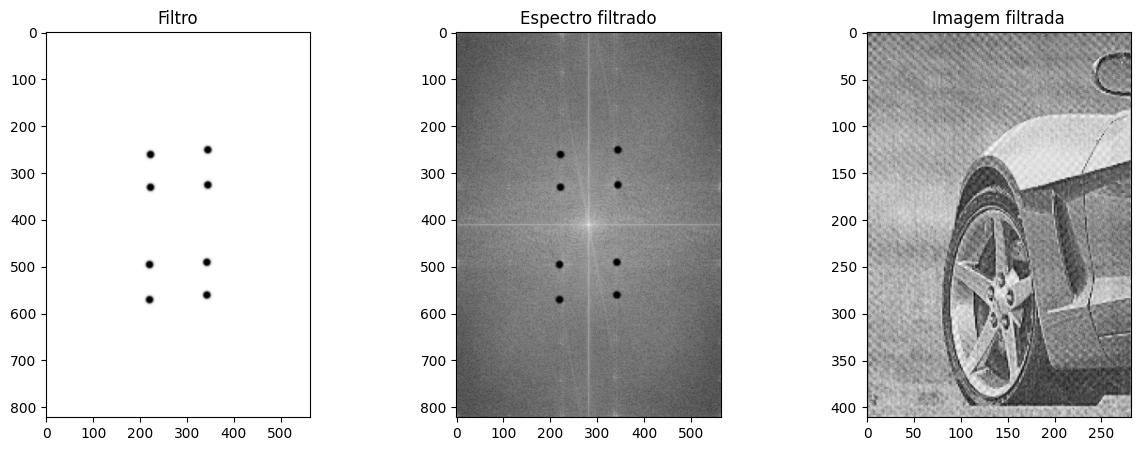

In [ ]:
## -- Seu código começa AQUI -- ##
def plot(imagens, titulos): #função para o plot
  plt.figure(figsize=(5*len(imagens),5)) #cria uma figura 10x5 e plota a imagem original e seu espectro
  for j in range(len(imagens)):
    plt.subplot(1,len(imagens),j+1)
    plt.title(f"{titulos[j]}")
    plt.imshow(imagens[j],'gray')
  plt.show()

#filtro notch reject butterworth
def notch_reject_butter(D0, n,u0,v0):
  filtro = np.zeros((Mf, Nf))
  for x in range(0, Mf):
    for y in range (0, Nf):
      D1 = np.sqrt((x-(cx + u0))**2 +(y-(cy + v0))**2)
      D2 = np.sqrt((x-(cx - u0))**2 +(y-(cy - v0))**2)
      filtro[x,y] = 1/((1+(D0/D1)**(2*n))*(1+(D0/D2)**(2*n)))
  return filtro

def calcula_inversa(filtro): #calcula a inversa do espectro filtrado, fazendo filtro x fshift definido no item anterior
  ifiltrado = np.fft.ifftshift(filtro*fshift)
  ifiltrado = np.fft.ifft2(ifiltrado)
  ifiltrado = np.abs(ifiltrado)
  ifiltrado = ifiltrado[0:M,0:N]
  return ifiltrado

img =cv.imread("car.png", cv.IMREAD_GRAYSCALE) #ler a imagem

M = img.shape[0]
N = img.shape[1]
Mf = 2*M
Nf = 2*N

cx = Mf//2
cy = Nf//2

#espectro de frequências com padding
f = np.fft.fft2(img,s=(Mf,Nf))
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift)+1.)

#recorte da região do espectro
magnitude_spectrum_recortado = magnitude_spectrum[0:800,200:360]

#notch 4 pontos mais próximos
filtro4pontos = notch_reject_butter(8,4,80,60) * notch_reject_butter(8,4,85,-62)
filtro8pontos = filtro4pontos * notch_reject_butter(8,4,150,60) * notch_reject_butter(8,4, 160, -62)

#inversa dos filtros
inversa4pontos = calcula_inversa(filtro4pontos)
inversa8pontos = calcula_inversa(filtro8pontos)

#plot da imagem, espectro e recorte
plot([img, magnitude_spectrum, magnitude_spectrum_recortado],["Imagem original", "Imagem do espectro", "Espectro recortado"])
print("\n")

#plot para os 4 pontos
plot([filtro4pontos, filtro4pontos*magnitude_spectrum, inversa4pontos],["Filtro", "Espectro filtrado", "Imagem filtrada"])

#plot para os 8 pontos
print("\n")
plot([filtro8pontos, filtro8pontos*magnitude_spectrum, inversa8pontos],["Filtro", "Espectro filtrado", "Imagem filtrada"])

## -- Seu código termina AQUI -- ##

## Comentários:
#os filtros foram feitos empiricamente. Ao sobrepor o espectro e os filtros, vê-se que primeiros os 4 pontos mais próximos foram filtrados e depois os 8 mais próximos
#Olhando a imagem original e as 2 filtradas, percebe-se diferenças quanto as senoides, a original tem mais senoides presentes que a filtrada com os 4 pontos que tem
#mais senoides que a filtrada com 8 pontos. Como era esperado do filtro notch.

### 2) Realce (Nota: 3,0):

Nesta parte da lista iremos trabalhar com o filtro de realce. Para isso, utilizaremos a imagem ```parede.tif```. Considere que a imagem foi digitalizada com resolução de 500 DPI.
Dica: Como este filtro realça principamente os detalhes, é interessante analisar as imagens sempre com ZOOM!

1. Carregue a imagem “parede.tif” e mostre-a.
2. Visualizar a imagem no domínio da frequência (Espectro de Fourier). **Lembre-se do padding.**
4. Criar um filtro de realce (30%), utilizando passa-alta do tipo “Butterworth” (n = 2), com frequência de corte 3,0 ciclos/mm. Aplicar na imagem e verificar o resultado.
5. Criar um filtro do tipo "Gaussiano", no domínio da frequência, que realce em 40% todas as frequências entre 2,0 e 4,0 ciclos/mm. Aplicar na imagem e verificar o resultado no domínio do espaço.



<ipython-input-4-a6661c59a0c4>:7: RuntimeWarning: divide by zero encountered in double_scalars
  filtro[x,y] = 1/(1+(D0/D)**4)


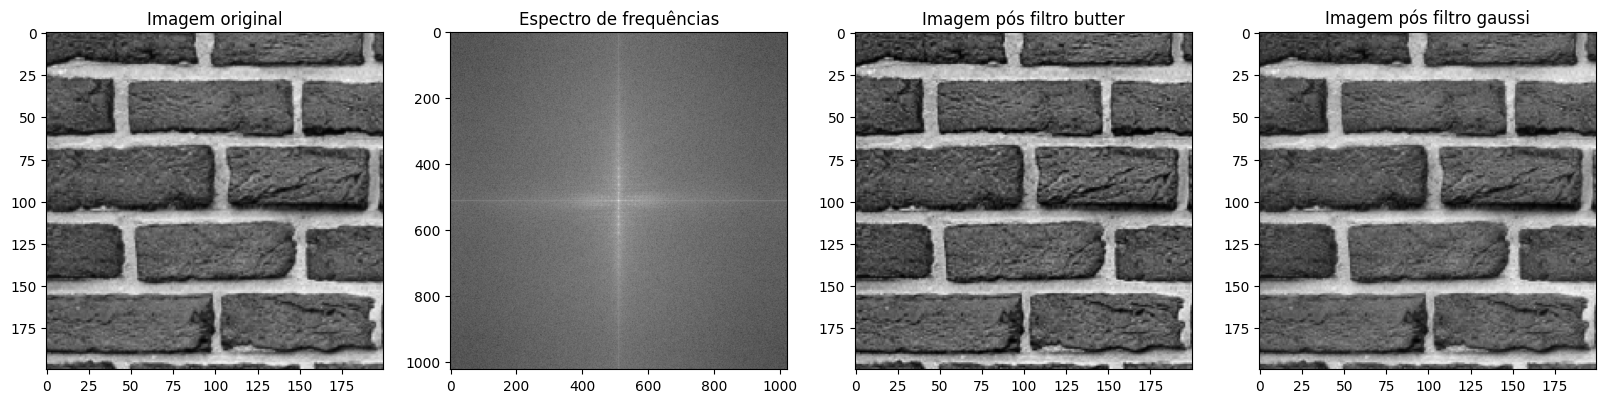

In [ ]:
## -- Seu código começa AQUI -- ##
def BUTTERWORTH_PASSA_ALTA():
  filtro = np.zeros((Mf2, Nf2))
  for x in range(0, Mf2):
    for y in range (0, Nf2):
      D = np.sqrt((x-cx2)**2+(y-cy2)**2)
      filtro[x,y] = 1/(1+(D0/D)**4)
  return filtro

def realce_butter():
  filtro2 = np.zeros((Mf2, Nf2))
  filtro2 = 0.3*BUTTERWORTH_PASSA_ALTA()+1
  return filtro2

#ler a imagem
img2 = cv.imread("parede.tif", cv.IMREAD_UNCHANGED)

#dimensões da imagem
M2 = img2.shape[0]
N2 = img2.shape[1]
Mf2 = 2*M2
Nf2 = 2*N2

#achar o centro
cx2 = Nf2//2
cy2 = Mf2//2

#calcular D0
dx = 25.4/500
du =1/(2*dx*M2)
D0 = 3/du

#espectro de frequências com padding
f2 = np.fft.fft2(img2,s=(Mf2,Nf2))
fshift2 = np.fft.fftshift(f2)
magnitude_spectrum2 = 20*np.log(np.abs(fshift2)+1.)

filtro2 = realce_butter() #filtro de realce butterworth passa alta
magnitude_spectrum_filtrado2 = 20*np.log(np.abs(filtro2*fshift2)+1.) #novo espectro de magnitude após fazer filtroxfshift, calcular o abs e fazer o log
ifiltrado2 = np.fft.ifftshift(filtro2*fshift2)
ifiltrado2 = np.fft.ifft2(ifiltrado2)
ifiltrado2 = np.abs(ifiltrado2)
imagem_original_filtrada2 = ifiltrado2[0:200,0:200]

#função para o gaussiano
def GAUSSIANO(MF, NF, cx, cy, d0):
  filtro = np.zeros((MF, NF))
  for x in range(0, MF):
    for y in range (0, NF):
      D = np.sqrt((x-cx)**2+(y-cy)**2)
      filtro[x,y] = np.exp((-(D**2)/(2*(d0**2))))
  return filtro

#função para o realce gaussian
def realce_gaussi(filtro):
  filtro2 = 0.4*filtro+1
  return filtro2

dif_gaussiana = 1-GAUSSIANO(Mf2, Nf2, cx2, cy2, 4/du) -1+GAUSSIANO(Mf2, Nf2, cx2, cy2, 2/du)
dif_gaussiana_realce = realce_gaussi(dif_gaussiana) #filtro de realce gaussiano passa alta

magnitude_spectrum_filtrado2 = 20*np.log(np.abs(dif_gaussiana_realce*fshift2)+1.) #novo espectro de magnitude após fazer filtroxfshift, calcular o abs e fazer o log
ifiltrado2 = np.fft.ifftshift(dif_gaussiana_realce*fshift2)
ifiltrado2 = np.fft.ifft2(ifiltrado2)
ifiltrado2 = np.abs(ifiltrado2)
imagem_original_filtrada_gaussiana = ifiltrado2[0:200,0:200]

#as imagens foram recortar de 0:200, 0:200 pra visualizar melhor, como dito no enunciado
plot([img2[0:200, 0:200], magnitude_spectrum2, imagem_original_filtrada2, imagem_original_filtrada_gaussiana],["Imagem original", "Espectro de frequências", "Imagem pós filtro butter", "Imagem pós filtro gaussi"])
## -- Seu código termina AQUI -- ##

### 3) Filtragem Homomórfica (Nota: 4,0)

Agora vamos trabalhar o realce corrigindo uma imagem com iluminação não uniforme. Para isso, vamos trabalhar com a figura "***hill.tif***". Considere que essa imagem foi digitalizada com resolução de 300 DPI.

1. Carregue o arquivo de imagem ```hill.tif``` e mostre-a.
2. Aplique uma correção Logarítmica à imagem original a fim de fazer uma correção de contraste. *Dica: após essa correção, converta a imagem_Log para float32*.
3. Construa padding simétrico (espelhamento) para eliminar o efeito de *wrap around*. Para fazer isso, utilize a função ```np.pad```.
4. Agora, vamos passar a imagem com *padding* para o domínio da frequência e visualizar o espectro de frequências.
5. Em seguida, crie um filtro do tipo homomórfico, com ```γL = 0,5``` e ```γH = 1,5```, com variação Gaussiana e com frequência de corte de 2,0 ciclos/mm e aplique na imagem. Mostre o filtro construido.
6. Aplique o filtro homomórfico criado sobre a imagem no domínio da frequência.
7. Aplique a transformada inversa para retornar a imagem ao domínio original.
8. Aplique uma correção exponencial (```np.exp```) para corrigir a transformação logarítmica no início. Por fim, faça um alargamento de contraste sobre a imagem filtrada no domínio original e mostre-a.
9. Comentar os resultados encontrados após aplicação dos filtros.




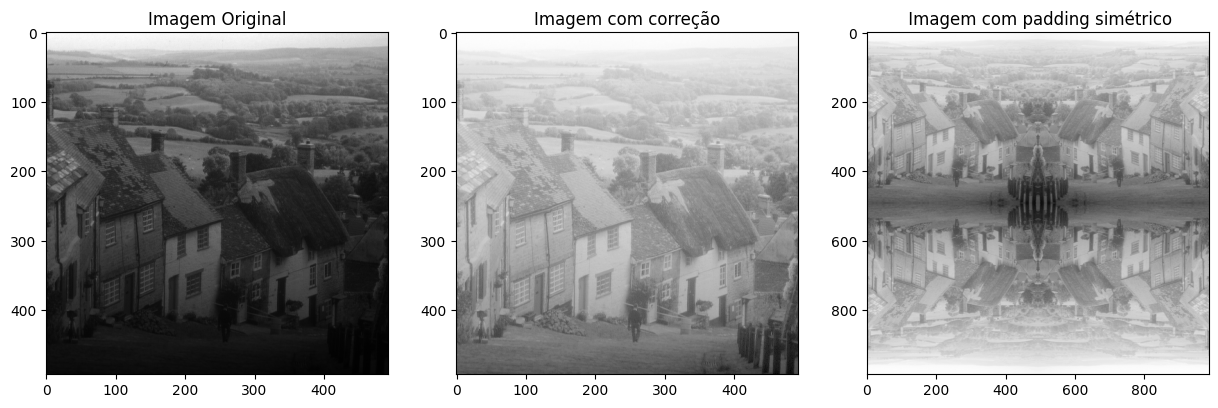

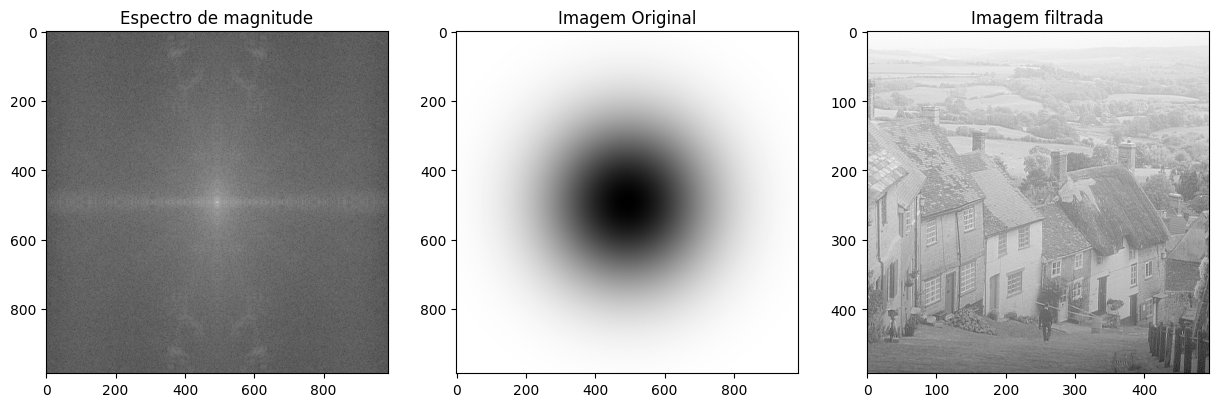

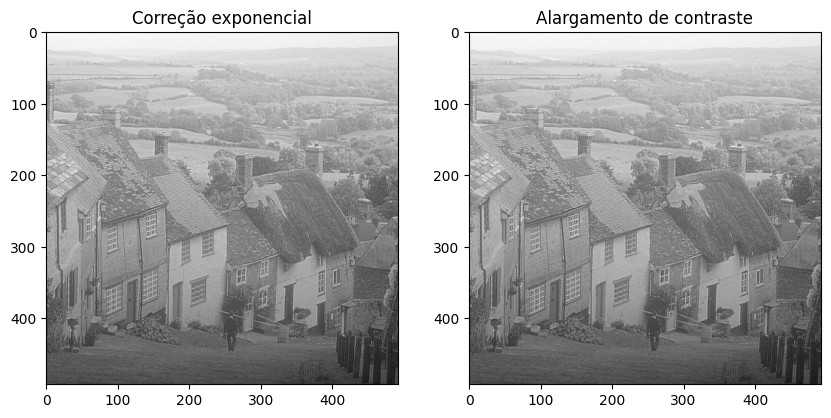

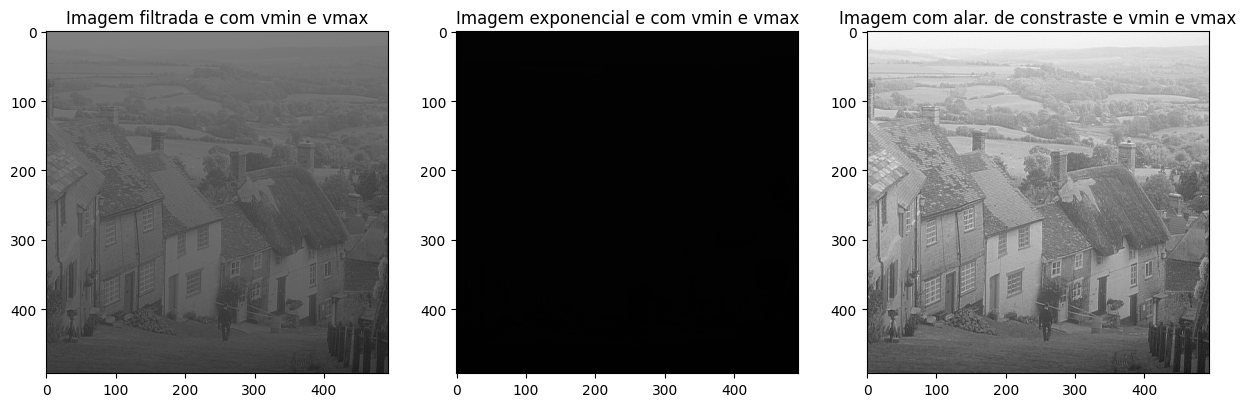

In [ ]:
## -- Seu código começa AQUI -- ##
#1 ler a imagem
img3 = cv.imread("hill.tif", cv.IMREAD_UNCHANGED)

#dimensões da imagem
M3 = img3.shape[0]
N3 = img3.shape[1]
Mf3 = 2*M3
Nf3 = 2*N3

#achar o centro
cx3 = Nf3//2
cy3 = Mf3//2

#calcular D0
dx = 25.4/300
du =1/(2*dx*M3)
D0 = 2/du

#2 - CORREÇÃO
c1 = 255/(np.log10(np.max(img3)+1))
img3_correção = np.uint8(c1 * np.log10(img3 + 1.0))
img3_correção = img3_correção.astype('float32')

#3 - PADDING SIMÉTRICO
img3_padding_sim = np.pad(img3_correção, ((0,M3),(0,N3)), "symmetric")

#4 - DOMINIO DA FREQUÊNCIA
f3 = np.fft.fft2(img3_padding_sim)
fshift3 = np.fft.fftshift(f3)
magnitude_spectrum3 = 20*np.log(np.abs(fshift3)+1.)

#plot de algumas coisas
plot([img3, img3_correção, img3_padding_sim],["Imagem Original", "Imagem com correção", " Imagem com padding simétrico"])

#5 - Homomórfico
filtro_gau = GAUSSIANO(Mf3, Nf3, cx3, cy3, D0)
filtro_passa_alta_gaussiano = 1 - filtro_gau
filtro_homo = (1.5 - 0.5)*filtro_passa_alta_gaussiano + 0.5

#6/7 - Aplicação do filtro e transformada inversa
magnitude_spectrum_filtrado3 = 20*np.log(np.abs(filtro_homo*fshift3)+1.) #novo espectro de magnitude após fazer filtroxfshift, calcular o abs e fazer o log
ifiltrado3 = np.fft.ifftshift(filtro_homo*fshift3)
ifiltrado3 = np.fft.ifft2(ifiltrado3)
ifiltrado3 = np.abs(ifiltrado3)
imagem_original_filtrada3 = ifiltrado3[0:M3,0:N3]

#mais alguns plots
print("\n")
plot([magnitude_spectrum3, filtro_homo, imagem_original_filtrada3],["Espectro de magnitude", "Imagem Original", "Imagem filtrada"])

#8 - Correção exponencial e alargamento de contraste
print("\n")
img_correção_exp = np.exp(imagem_original_filtrada3/c1)

#alargamento de contraste
def alonga(img):
  img_in = img.copy().astype('float32') #copia a img para a variável img_in
  out = (img_in-np.min(img))*(255./(np.max(img)-np.min(img))) #g(x,y) = (f(x,y)-A)*(L-1)/(B-A)
  out = out.astype('uint8') #A imagem normalizada é convertida denovo para o formato original que era uint8
  return out

img_alargada = alonga(img_correção_exp)

plot([img_correção_exp, img_alargada], ["Correção exponencial", "Alargamento de contraste"])

#plotando com vmin e vmax
print("\n")
plt.figure(figsize=(15,5)) #cria uma figura 10x5 e plota a imagem original e seu espectro
plt.subplot(1,3,1)
plt.title("Imagem filtrada e com vmin e vmax")
plt.imshow(imagem_original_filtrada3, 'gray', vmin=0, vmax =255)
plt.subplot(1,3,2)
plt.title("Imagem exponencial e com vmin e vmax")
plt.imshow(img_correção_exp, 'gray', vmin=0, vmax =255)
plt.subplot(1,3,3)
plt.title("Imagem com alar. de constraste e vmin e vmax")
plt.imshow(img_alargada, 'gray', vmin=0, vmax =255)
plt.show()
## -- Seu código termina AQUI -- ##

## Comentários:
#Após a correção logaritmica a imagem ficou bem mais clara. O padding utilizado foi o simétrico, e percebe-se que ficou como esperado, a imagem está
#espelhada na horizontal e vertical. Após aplicar o filtro, obtém-se ma imagem ainda mais clara e com melhor visualização dos detalhes.
#Se o plot da correção exponecial e alargamento de contraste forem feitos sem definir um valor mínimo e máximo, as imagens ficam mto parecidas.
#Porém, aplicando esses valores, a  imagem filtrada é mais escura do que a vista nos outros casos, a correção exponencial fica preta, mas após o alargamento
#a imagem volta a ficar clara, parecido com o caso em que não são definidos o vim e vmax, dessa forma é possível ver diferenças entre as imagens.